# **FORECASTING PRICE OF LETTUCE IN THE UK**
© **Explore Data Science Academy**

_Prepared by:_
- McMunashe Munemo
- Stanley Agbo
- Nicodemus Amollo
- Winfred Mutinda
- Colin Mburugu
- Dennis Gitari

## **TABLE OF CONTENTS**

[Introduction](#introduction)
- Problem Statement
- Table of Contents
- Summary
    - Agenda
    - Deliverables
    - Results
    - Future Considerations
- Preliminary Activities
    - Importing Packages
    - Loading the Datasets
    
[Exploratory Data Analysis](#exploratory_data_analysis)
- Functions Declaration
- Statistical Summaries
    - Train Dataset
    - Test Dataset
- Visualizations

[Feature Engineering](#feature_engineering)
- Functions Declaration
- Dealing with Null Values
- Splitting features
- Dummy Variables
- Data Scaling
- Feature Selection

[Modelling](#modelling)
- Functions Declaration


[Model Performance Comparison](#model_performance_comparison)


[Model Explanation](#model_explanation)

[Conclusion](#conclusion)

[Appendix](#appendix)

## **INTRODUCTION**

This section describes the project briefly

## **IMPORTING PACKAGES**

In [86]:
# Packages for data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

# Packages for stationarity check
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.tsa.statespace import sarimax
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Packages for building models
import statsmodels.api as sm

# Packages for model evaluation
from sklearn.metrics import mean_squared_error

## **LOADING THE DATA**

In [6]:
 
df = pd.read_stata("data/5pct_sample_2019_10.dta")

In [7]:
db_date = pd.read_csv("data/db_date.csv")

## **EXPLORATORY DATA ANALYSIS**

In [8]:
df.head()

,date,shop_code,region,price,item
0,323,188,Catalogue collections,52.000000,349
1,326,188,Catalogue collections,77.000000,349
2,332,188,Catalogue collections,49.000000,349
3,328,203,Catalogue collections,37.000000,349
4,337,203,Catalogue collections,39.990002,349


In [9]:
df.shape

(1771521, 5)

In [10]:
df1 = df[(df['item']== 250)|(df['item']== 266)]
df1.shape

(4812, 5)

In [11]:
#Dataframe to be used for further analysis
perc = pd.read_csv("data/percentiles_2019_10.csv")

In [12]:
perc1 = perc[(perc['item']== 250)|(perc['item']== 266)]
perc1.shape

(499, 11)

In [13]:
db_date.head()

,date,quote_date,obs_panel,obs,date2,date3,year,year_s,month,month_s,...,p_sd,cpiindex00allitems2015100,cpiindex012nonalcoholicbeverages,cpiindex011food2015100,cpiindex02alcoholicbeveragestoba,cpiindex01foodandnonalcoholicbev,cpi00_adjustment,day,day_s,date4
0,1,198802,35459,51065,01-02-1988,01-02-1988,1988,1988.0,2,2.0,...,54.338814,48.6,45.9,48.5,27.4,48.3,1.000000,1.0,1.0,1988-02-01
1,2,198803,35240,49987,01-03-1988,01-03-1988,1988,1988.0,3,3.0,...,51.615620,48.7,46.2,48.6,27.5,48.4,1.002058,1.0,1.0,1988-03-01
2,3,198804,36066,51716,01-04-1988,01-04-1988,1988,1988.0,4,4.0,...,53.485882,49.3,46.6,48.9,27.9,48.7,1.014403,1.0,1.0,1988-04-01
3,4,198805,35869,51209,01-05-1988,01-05-1988,1988,1988.0,5,5.0,...,53.936596,49.5,47.2,49.0,28.0,48.8,1.018519,1.0,1.0,1988-05-01
4,5,198806,35811,51126,01-06-1988,01-06-1988,1988,1988.0,6,6.0,...,53.684380,49.7,47.7,49.0,28.0,48.9,1.022634,1.0,1.0,1988-06-01


In [14]:
#cols to drop
cols = ['quote_date','obs_panel', 'obs', 'date3', 'year', 'year_s', 'month',
       'month_s', 'quarter', 'p_min', 'p_max', 'p_mean', 'p_med', 'p_sd',
       'cpiindex012nonalcoholicbeverages',
       'cpiindex02alcoholicbeveragestoba',
       'cpiindex01foodandnonalcoholicbev', 'cpi00_adjustment', 'day', 'day_s',
       'date4']

In [15]:
db_date.drop(columns = cols,inplace = True)

In [16]:
db_date.rename(columns = {'cpiindex00allitems2015100':'cpi_allitems','cpiindex011food2015100':'cpi_food'},inplace = True)

In [17]:
new_df = df1.merge(db_date, on = 'date')

In [18]:
new_df.head()

,date,shop_code,region,price,item,date2,cpi_allitems,cpi_food
0,23,1,London,0.99,250,01-12-1989,53.4,53.5
1,23,21,South East,0.99,250,01-12-1989,53.4,53.5
2,23,32,South West,1.00,250,01-12-1989,53.4,53.5
3,23,901,South West,0.89,250,01-12-1989,53.4,53.5
4,23,107,East Anglia,0.84,250,01-12-1989,53.4,53.5


In [19]:
new_df.shape

(4812, 8)

In [20]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4812 entries, 0 to 4811
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   date          4812 non-null   int16   
 1   shop_code     4812 non-null   int16   
 2   region        4812 non-null   category
 3   price         4812 non-null   float32 
 4   item          4812 non-null   int16   
 5   date2         4812 non-null   object  
 6   cpi_allitems  4812 non-null   float64 
 7   cpi_food      4812 non-null   float64 
dtypes: category(1), float32(1), float64(2), int16(3), object(1)
memory usage: 202.7+ KB


In [21]:
new_df.drop(columns = 'date',inplace = True)

In [22]:
new_df['Date'] = pd.to_datetime(new_df["date2"],format="%d-%m-%Y")

In [23]:
new_df['Year'] = new_df['Date'].dt.year
new_df['Month'] = new_df['Date'].dt.month

In [24]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4812 entries, 0 to 4811
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   shop_code     4812 non-null   int16         
 1   region        4812 non-null   category      
 2   price         4812 non-null   float32       
 3   item          4812 non-null   int16         
 4   date2         4812 non-null   object        
 5   cpi_allitems  4812 non-null   float64       
 6   cpi_food      4812 non-null   float64       
 7   Date          4812 non-null   datetime64[ns]
 8   Year          4812 non-null   int64         
 9   Month         4812 non-null   int64         
dtypes: category(1), datetime64[ns](1), float32(1), float64(2), int16(2), int64(2), object(1)
memory usage: 306.1+ KB


In [25]:
sns.set(rc={'figure.figsize':(15,8)})

<AxesSubplot:xlabel='Month', ylabel='price'>

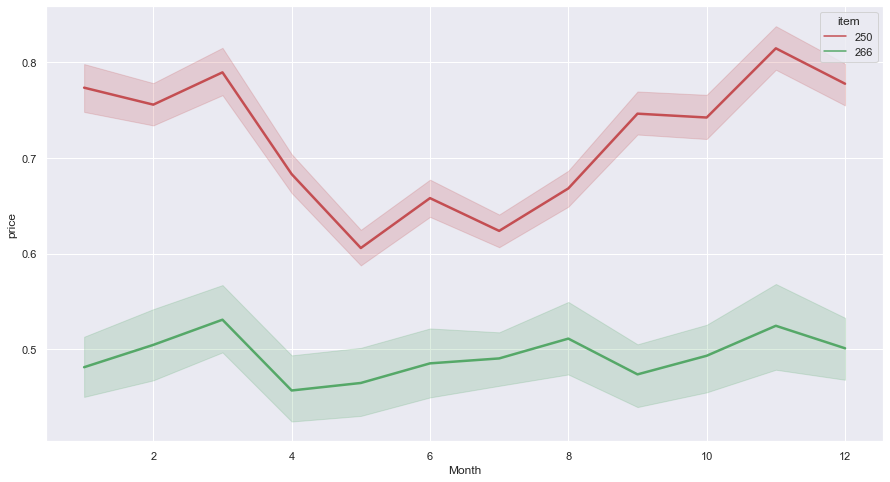

In [26]:
#comparing lettuce prices in different times of the year
sns.lineplot(data=new_df, x="Month", y="price", hue="item",palette=['r', 'g'], linewidth=2.5)

<AxesSubplot:xlabel='price', ylabel='region'>

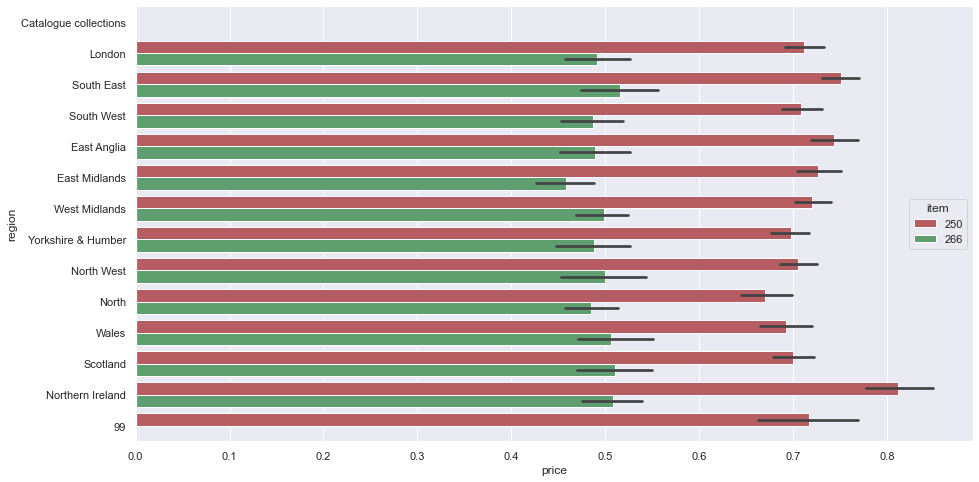

In [27]:
#Seeing the distribution of prices of different regions in the UK
sns.barplot(x="price", y="region", hue="item", data=new_df,palette=['r', 'g'] )

<AxesSubplot:xlabel='Year', ylabel='price'>

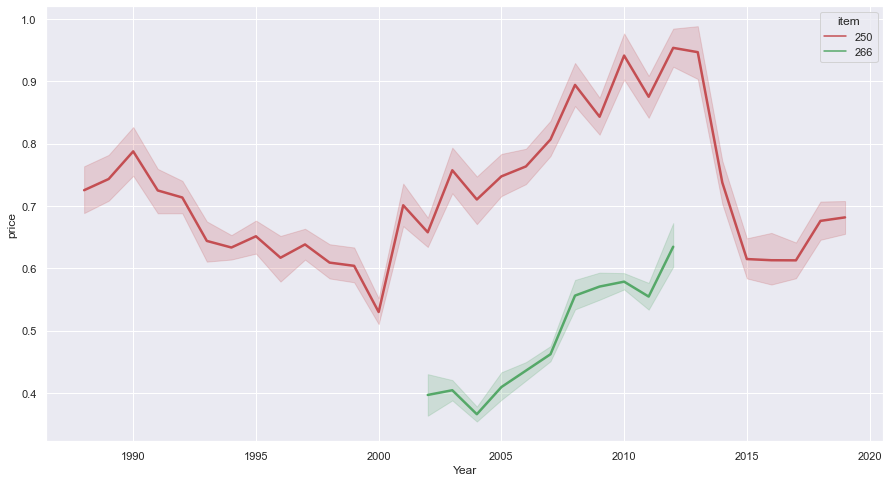

In [28]:
#comparing lettuce prices in different years
sns.lineplot(data=new_df, x="Year", y="price", hue="item",palette=['r', 'g'], linewidth=2.5)

#### **YEARS TO FOCUS ON**

#### **2008**

In [29]:
data_08 = np.where(new_df['Year'] == 2008)
df_08 = new_df.loc[data_08]

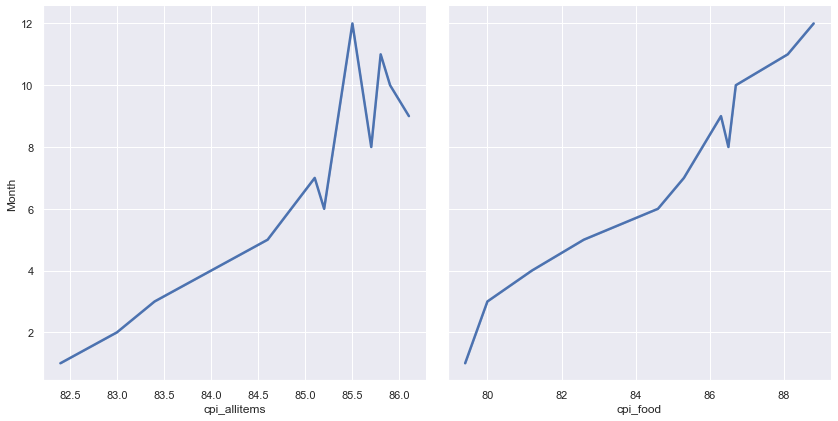

In [30]:
#CPI of all items and food in the year 2008
g = sns.PairGrid(df_08, x_vars=["cpi_allitems","cpi_food"], y_vars=["Month"],height = 6)
g.map(sns.lineplot, linewidth=2.5)

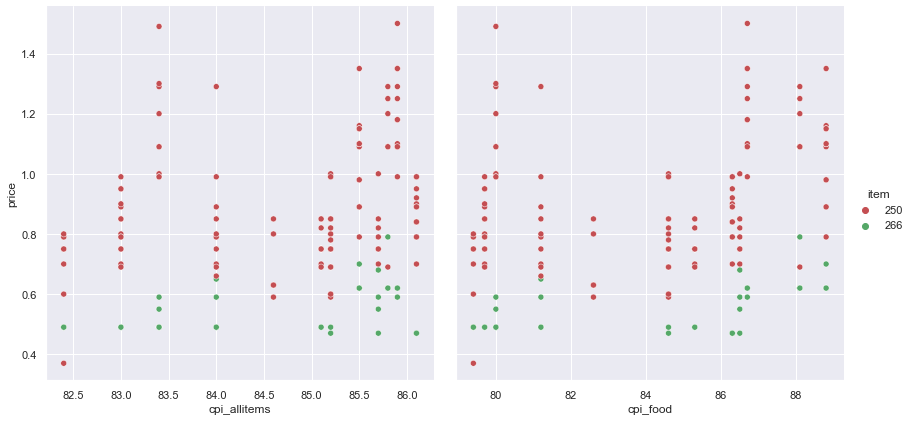

In [31]:
g = sns.PairGrid(df_08, x_vars=["cpi_allitems","cpi_food"], y_vars=["price"],palette=['r', 'g'], hue = 'item',height = 6)
g.map(sns.scatterplot)
g.add_legend()

In [32]:
corr = df_08[['cpi_allitems','cpi_food','price']].corr()
corr

,cpi_allitems,cpi_food,price
cpi_allitems,1.000000,0.930850,0.198551
cpi_food,0.930850,1.000000,0.218792
price,0.198551,0.218792,1.000000


<AxesSubplot:xlabel='Month', ylabel='price'>

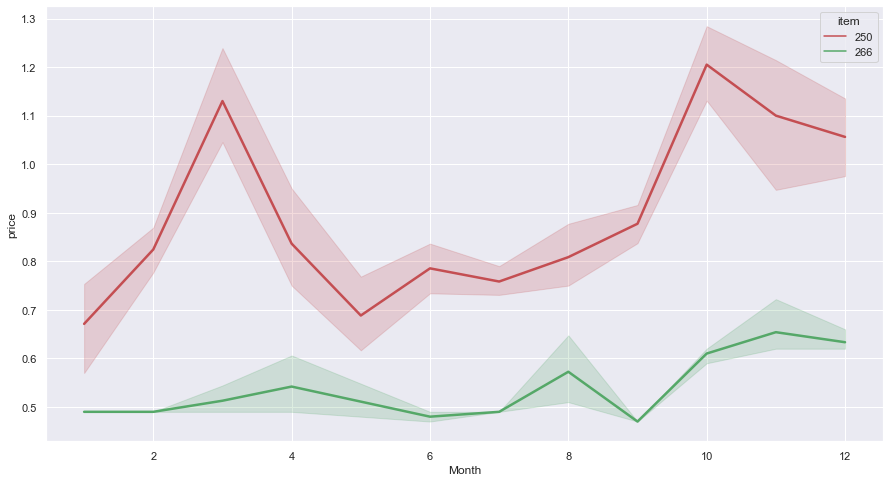

In [33]:
sns.lineplot(data=df_08, x="Month", y="price", hue="item",palette=['r', 'g'], linewidth=2.5)

#### **2016**

In [34]:
df_16 =  np.where(new_df['Year'] == 2016)
df_16 = new_df.loc[df_16]

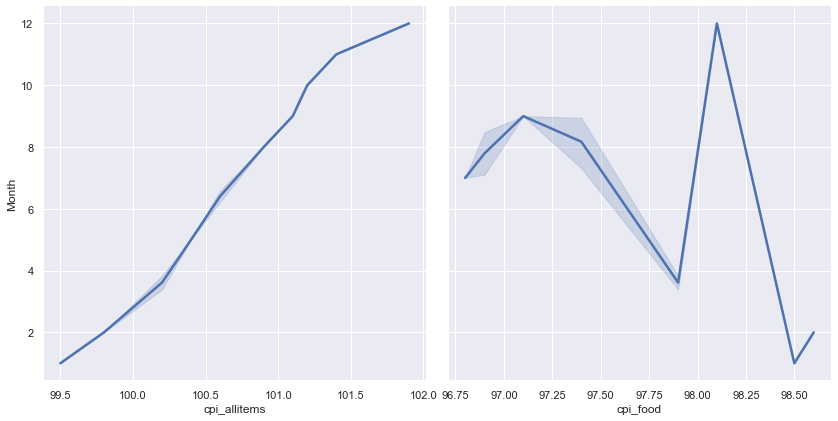

In [35]:
#CPI of all items and food in the year 2016
g = sns.PairGrid(df_16, x_vars=["cpi_allitems","cpi_food"], y_vars=["Month"],height = 6)
g.map(sns.lineplot, linewidth=2.5)

In [36]:
df_16['item'].unique()

array([250], dtype=int16)

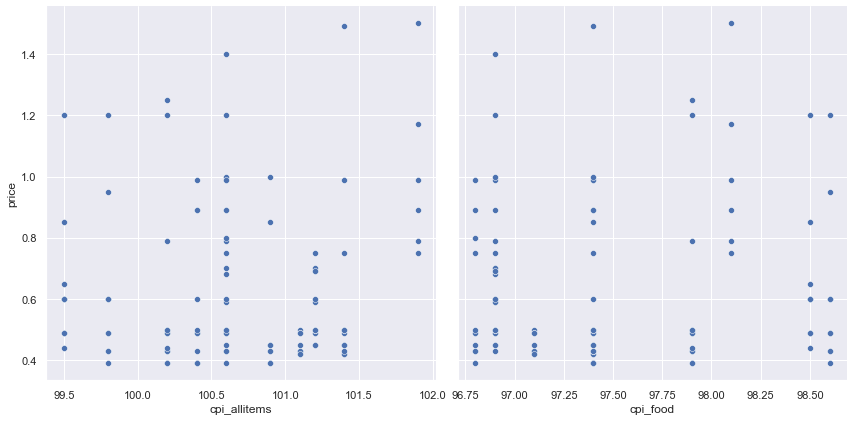

In [37]:
g = sns.PairGrid(df_16, x_vars=["cpi_allitems","cpi_food"], y_vars=["price"],height = 6)
g.map(sns.scatterplot)
g.add_legend()

In [38]:
corr = df_16[['cpi_allitems','cpi_food','price']].corr()
corr

,cpi_allitems,cpi_food,price
cpi_allitems,1.000000,-0.588386,0.083502
cpi_food,-0.588386,1.000000,0.067304
price,0.083502,0.067304,1.000000


<AxesSubplot:xlabel='Month', ylabel='price'>

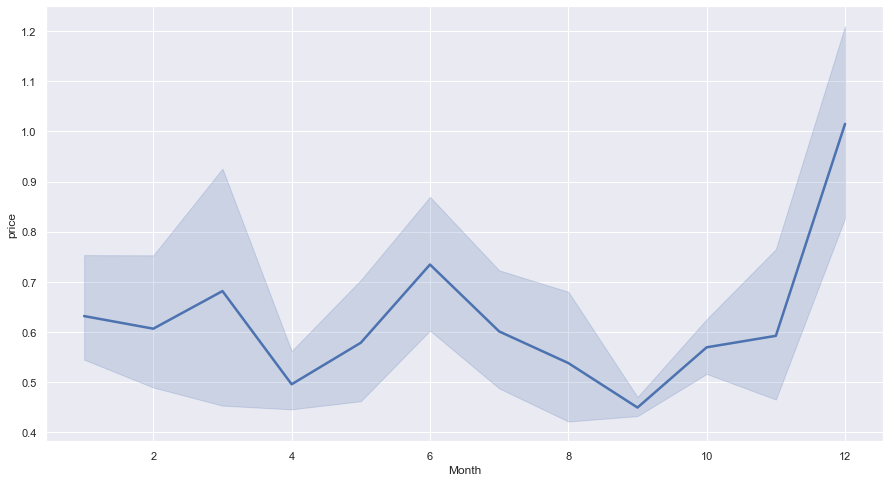

In [39]:
sns.lineplot(data=df_16, x="Month", y="price",linewidth=2.5)

#### **2019**

In [40]:
df_19 =  np.where(new_df['Year'] == 2019)
df_19 = new_df.loc[df_19]

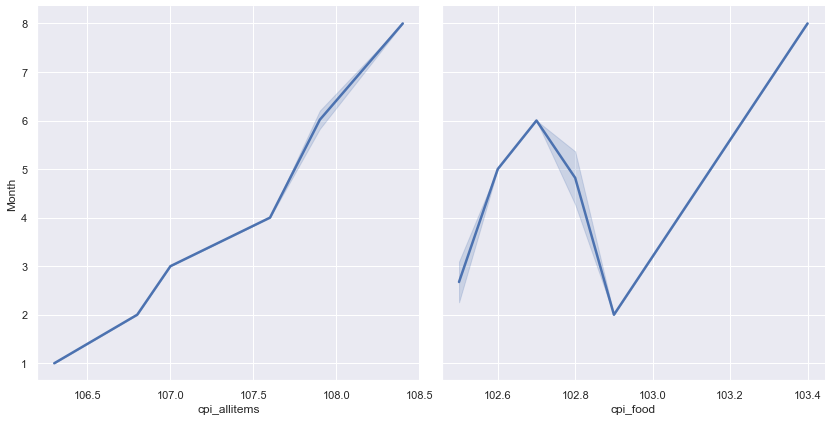

In [41]:
g = sns.PairGrid(df_19, x_vars=["cpi_allitems","cpi_food"], y_vars=["Month"],height = 6)
g.map(sns.lineplot, linewidth=2.5)

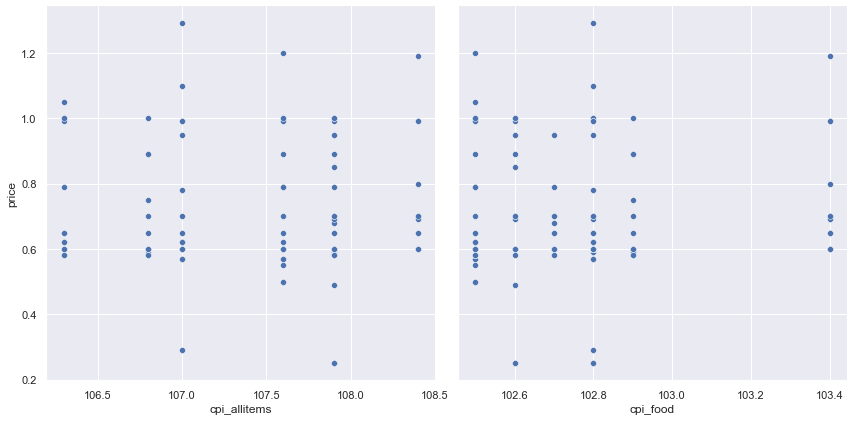

In [42]:
g = sns.PairGrid(df_19, x_vars=["cpi_allitems","cpi_food"], y_vars=["price"],height = 6)
g.map(sns.scatterplot)
g.add_legend()

In [43]:
corr = df_19[['cpi_allitems','cpi_food','price']].corr()
corr

,cpi_allitems,cpi_food,price
cpi_allitems,1.000000,0.459063,-0.021189
cpi_food,0.459063,1.000000,0.045498
price,-0.021189,0.045498,1.000000


<AxesSubplot:xlabel='Month', ylabel='price'>

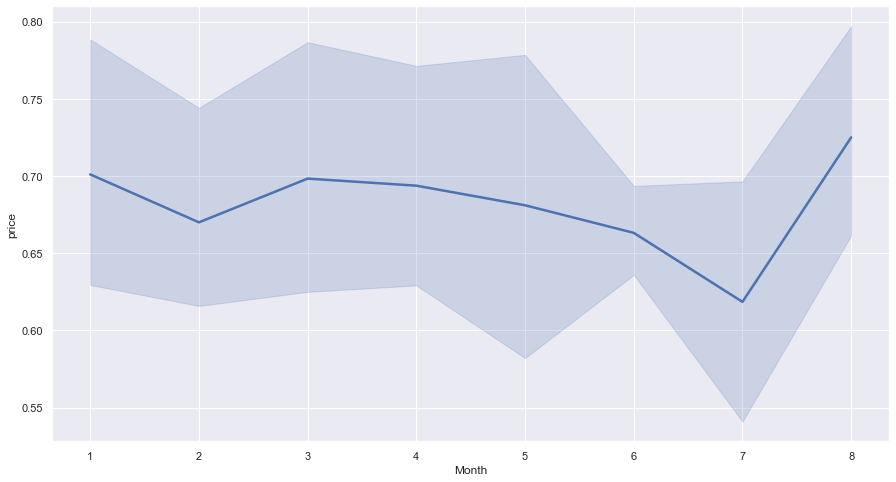

In [44]:
sns.lineplot(data=df_19, x="Month", y="price",linewidth=2.5)

## **DATA CLEANING AND PRE-PROCESSING**

In [45]:
#new_df = df.merge(db_date, on = 'date')

In [46]:
#new_df.head()

In [47]:
df1 = np.where(new_df['item'] == 250)

In [48]:
df1 = new_df.loc[df1]

In [49]:
ts = df1[['date2','price']]
ts

,date2,price
0,01-12-1989,0.99
1,01-12-1989,0.99
2,01-12-1989,1.00
3,01-12-1989,0.89
4,01-12-1989,0.84
...,...,...
4807,01-06-1989,0.85
4808,01-06-1989,0.49
4809,01-06-1989,0.55
4810,01-06-1989,0.84


In [50]:
ts.rename(columns={'date2':'date'},inplace = True)

C:\Users\BYTEWORKS\AppData\Local\Temp\ipykernel_11512\243174555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.rename(columns={'date2':'date'},inplace = True)


In [51]:
ts['date'] = pd.to_datetime(ts["date"],format="%d-%m-%Y")

C:\Users\BYTEWORKS\AppData\Local\Temp\ipykernel_11512\2922480741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['date'] = pd.to_datetime(ts["date"],format="%d-%m-%Y")


#### Data Cleaning and Pre-processing

In [52]:
#setting the date column as our new index
ts.set_index("date",inplace = True)

In [53]:
ts_1 = ts.copy()

In [54]:
ts_1.index.duplicated()

array([False,  True,  True, ...,  True,  True,  True])

In [55]:
ts_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4428 entries, 1989-12-01 to 1989-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4428 non-null   float32
dtypes: float32(1)
memory usage: 180.9 KB


In [56]:
ts_1 = ts_1['price'].resample('MS').sum()

In [57]:
ts_1.shape

(379,)

In [58]:
ts_1.head()

date
1988-02-01    7.25
1988-03-01    5.18
1988-04-01    3.93
1988-05-01    4.52
1988-06-01    4.83
Freq: MS, Name: price, dtype: float32

<AxesSubplot:xlabel='date'>

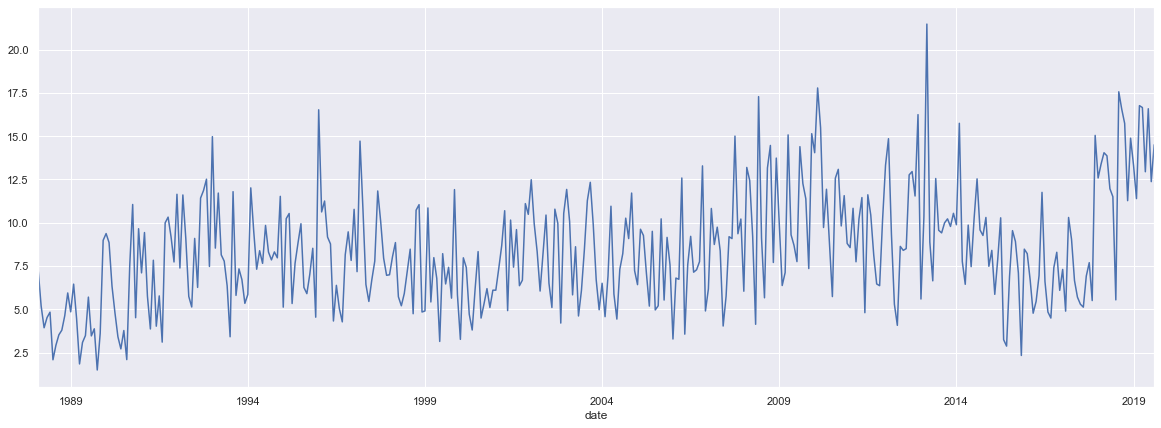

In [59]:
plt.figure(figsize = (20,7))
ts_1.plot()

#### Stationarity check

In [60]:
#import statsmodels.api as sm
#from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.stattools import adfuller

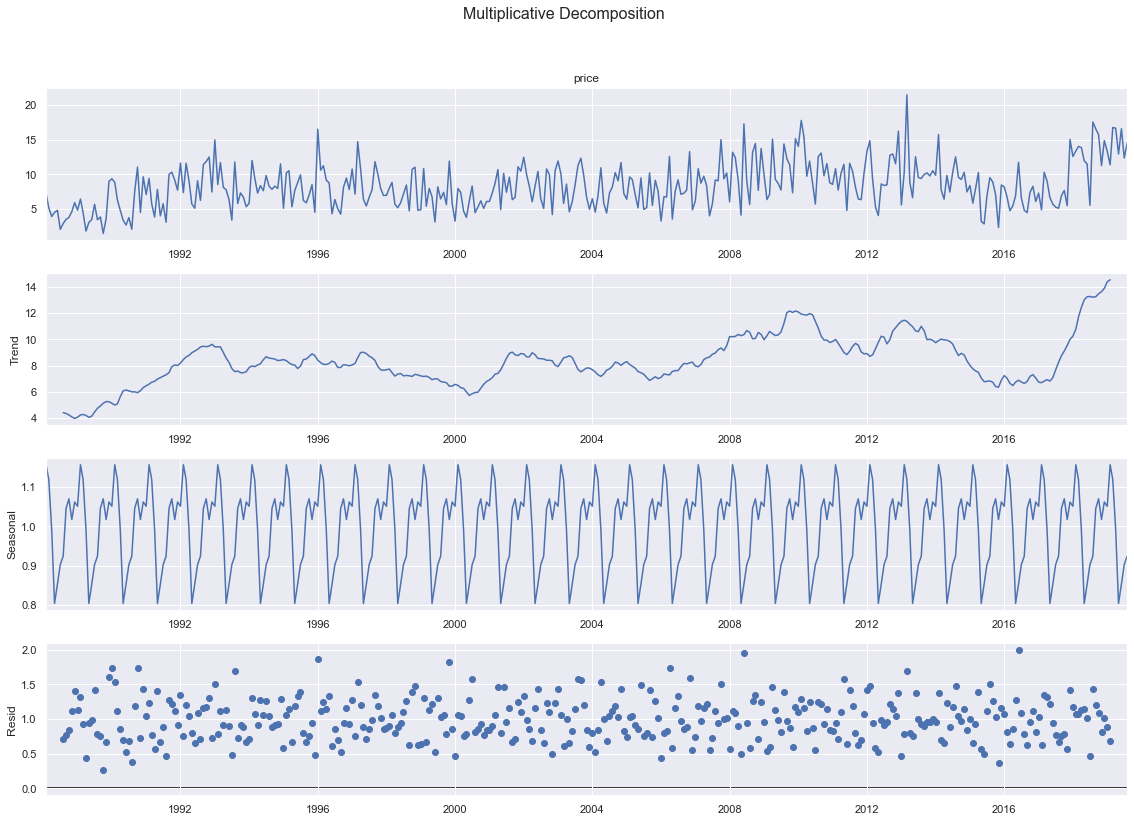

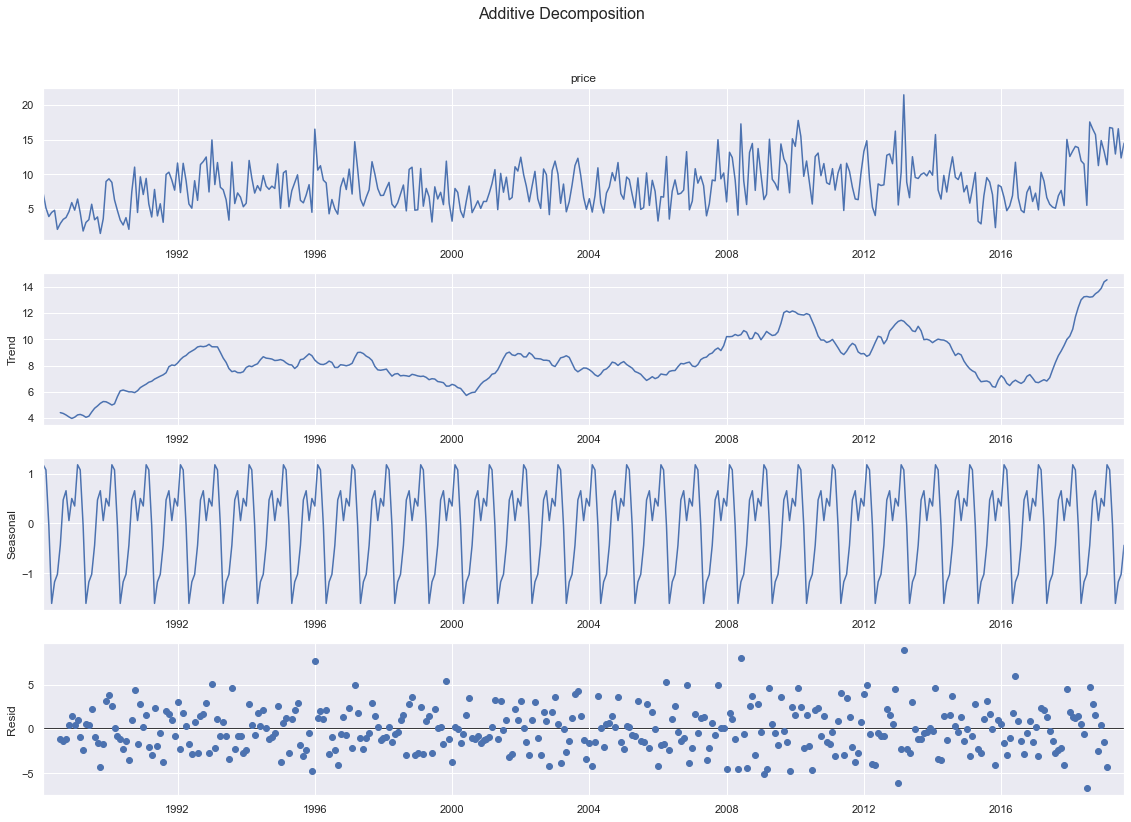

In [61]:
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(ts_1, model='multiplicative')

# Additive Decomposition
additive_decomposition = seasonal_decompose(ts_1, model='additive')

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [62]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis.Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

In [63]:
ts_1 = pd.DataFrame(ts_1)

In [64]:
adf_test(ts_1['price'])

ADF Statistics: -1.9959889515593023
p- value: 0.28833456881103203
weak evidence against null hypothesis,indicating it is non-stationary 


#### Making the series stationery

In [65]:
diff_price = np.diff(ts_1['price'], n=1)

In [66]:
adf_test(diff_price)

ADF Statistics: -7.176878365924915
p- value: 2.7127877995286995e-10
strong evidence against the null hypothesis, reject the null hypothesis.Data is stationary


In [67]:
#from statsmodels.graphics.tsaplots import plot_acf 

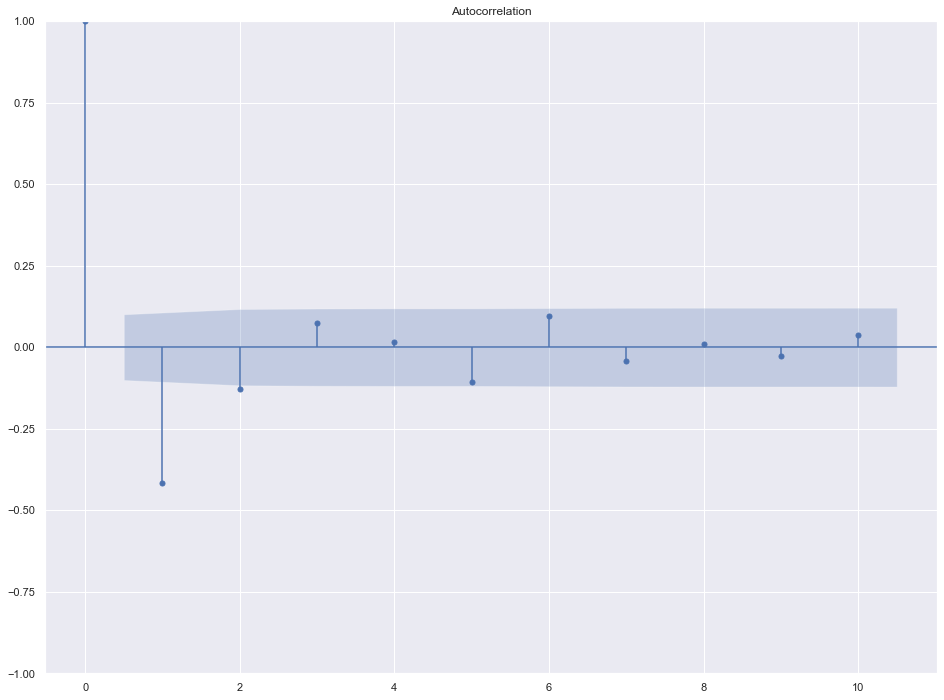

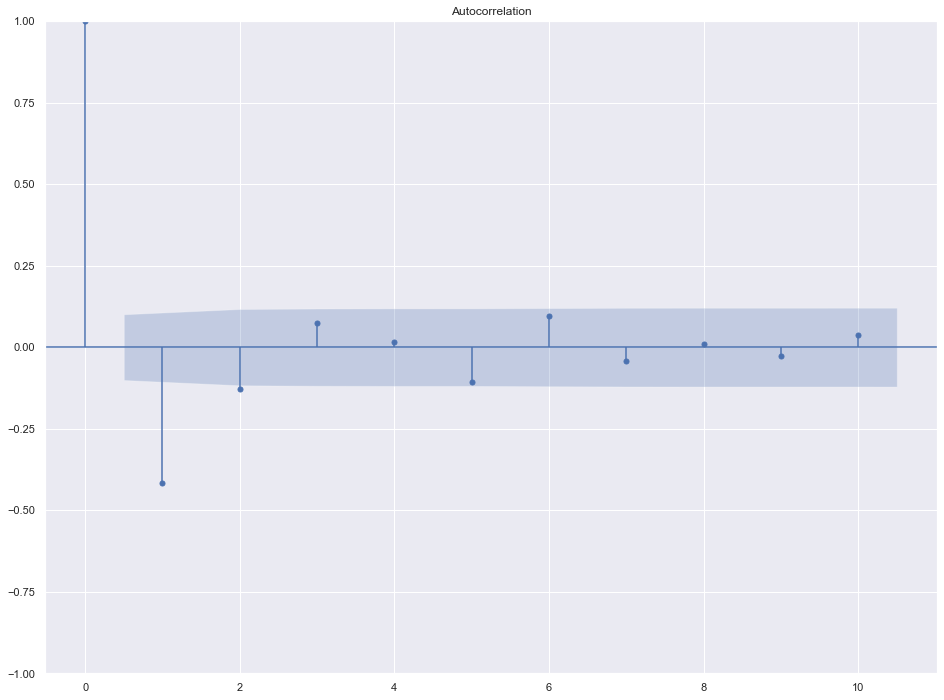

In [68]:
plot_acf(diff_price,lags = 10)

In [69]:
df_diff = pd.DataFrame({'prices_diff': diff_price}) 

<AxesSubplot:xlabel='date'>

<Figure size 360x360 with 0 Axes>

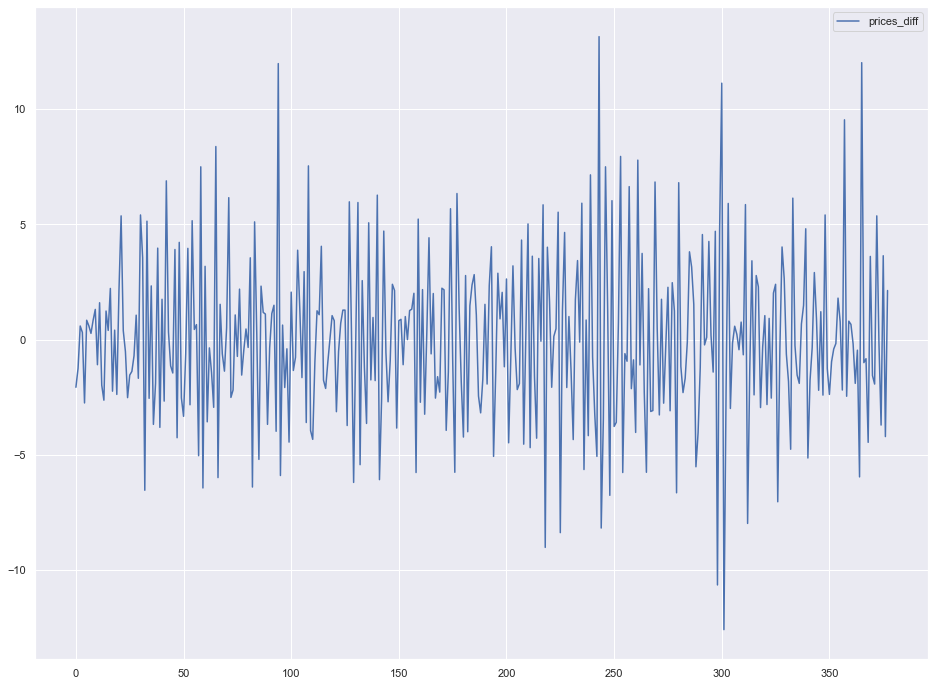

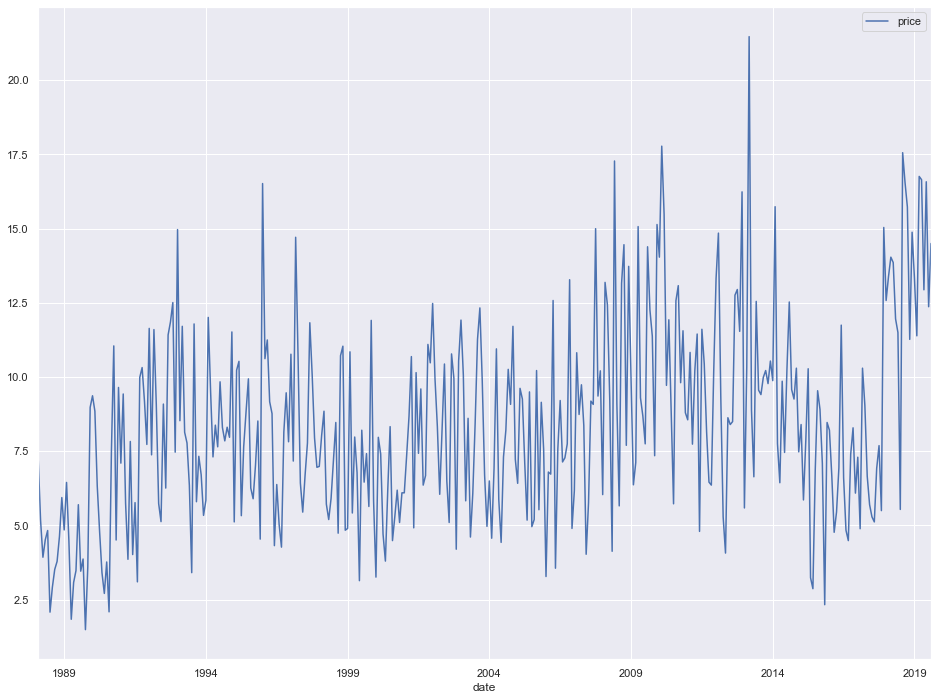

In [70]:
fig = plt.figure(figsize = (5, 5))
df_diff.plot()
ts_1.plot()

### Moving Average Model

In [71]:
#from statsmodels.tsa.statespace.sarimax import SARIMAX

In [72]:
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, 
method: str) -> list: 
 
        total_len = train_len + horizon 

        if method == 'mean': 
            pred_mean = [] 
 
            for i in range(train_len, total_len, window): 
                 mean = np.mean(df[:i].values) 
                 pred_mean.extend(mean for _ in range(window)) 
            return pred_mean 
    
        elif method == 'last': 
            pred_last_value = [] 

            for i in range(train_len, total_len, window): 
                    last_value = df[:i].iloc[-1].values[0] 
                    pred_last_value.extend(last_value for _ in range(window)) 

            return pred_last_value
        
        
        
        elif method == "MA":
        
        
         
                pred_MA = [] 
 
                for i in range(train_len, total_len, window): 
                         model = SARIMAX(df[:i], order=(0,0,2)) #B 
                         res = model.fit(disp=False) 
                         predictions = res.get_prediction(0, i + window - 1) 
                         oos_pred = predictions.predicted_mean.iloc[-window:] #C 
                         pred_MA.extend(oos_pred) 

                return pred_MA
    

In [73]:
train = df_diff[:int(0.8*len(df_diff))] 
test = df_diff[int(0.8*len(df_diff)):] 

In [74]:
pred_df = test.copy() 
TRAIN_LEN = len(train) 
HORIZON = len(test) 
WINDOW = 2 
pred_mean = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'mean') 
pred_last_value = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'last') 
pred_MA = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'MA') 
pred_df['pred_mean'] = pred_mean 
pred_df['pred_last_value'] = pred_last_value 
pred_df['pred_MA'] = pred_MA

<AxesSubplot:>

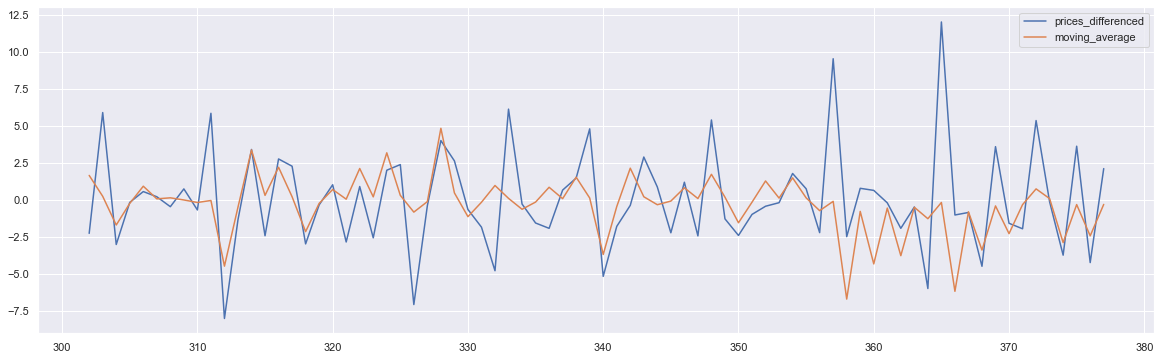

In [75]:
pred_df['prices_diff'].plot(label = 'prices_differenced',legend = True,figsize = (20,6))
#pred_df['pred_mean'].plot(label = 'mean',legend = True)
#pred_df['pred_last_value'].plot(label = 'last',legend = True)
pred_df['pred_MA'].plot(label = 'moving_average',legend = True)

In [76]:
#from sklearn.metrics import mean_squared_error 
mse_mean = mean_squared_error(pred_df.prices_diff, pred_df.pred_mean) 
mse_last = mean_squared_error(pred_df.prices_diff, pred_df.pred_last_value)
mse_MA = mean_squared_error(pred_df.prices_diff, pred_df.pred_last_value)

In [77]:
mse_last

35.641087

<BarContainer object of 3 artists>

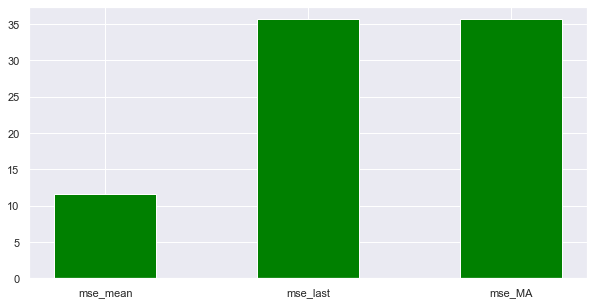

In [78]:
fig = plt.figure(figsize = (10, 5))
plt.bar(['mse_mean','mse_last','mse_MA'],[mse_mean,mse_last,mse_MA],width = 0.5,color = 'green')

#### Train - Test split

In [79]:
size = int(len(ts) * 0.8)

In [80]:
ts_train = ts.iloc[:size]

In [81]:
ts_test = ts.iloc[size:]

In [82]:
ts_train.tail()

,price
date,
2018-06-01,0.99
2018-06-01,0.54
2018-06-01,0.55
2018-06-01,0.54
2018-06-01,0.55


In [83]:
ts_test.head()

,price
date,
1989-01-01,0.53
1989-01-01,0.70
1989-01-01,0.79
1989-01-01,0.49
1989-01-01,0.79


#### Building ARIMA model

In [84]:
#from statsmodels.tsa.arima_model import ARIMA

In [87]:
model = sm.tsa.arima.ARIMA(ts_train,order = (1,1,1)).fit()

c:\Users\BYTEWORKS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\BYTEWORKS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\BYTEWORKS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\BYTEWORKS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\BYTEWORKS

#### prediction

In [88]:
len(ts_train)

3542

In [89]:
pred = model.predict(start = len(ts_train),end = (len(ts)-1))

c:\Users\BYTEWORKS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [90]:
pred.head()

3542    0.596497
3543    0.598424
3544    0.598503
3545    0.598507
3546    0.598507
Name: predicted_mean, dtype: float64

#### Model evaluation

In [92]:
#from sklearn.metrics import mean_squared_error

In [93]:
err = np.sqrt(mean_squared_error(ts_test,pred))
err

0.2701745178295689

<AxesSubplot:xlabel='date'>

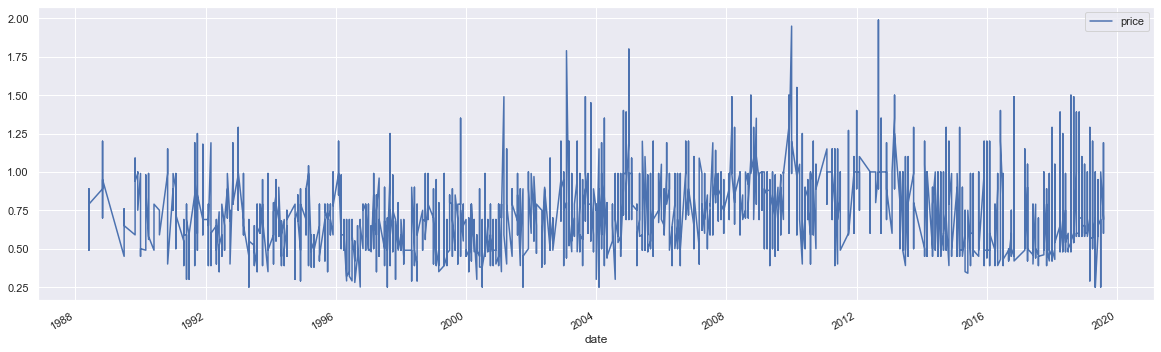

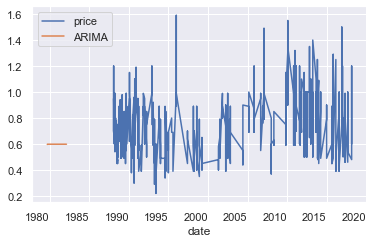

In [94]:
ts_train.plot(label = 'train',legend = True,figsize = (20,6))
ts_test.plot(label = 'test',legend = True)
pred.plot(label = 'ARIMA',legend = True)